## Experiment on image classification

### Basic Image classification example

At the first step we need to import the necessary libraries and packages, and also configure a path to dataset.
The example uses a dataset that can be downloaded [here](https://www.kaggle.com/datasets/apollo2506/landuse-scene-classification).

In [1]:
import os

from torchvision.transforms import ToTensor, Resize, Compose

from fedot_ind.api.main import FedotIndustrial

DATASETS_PATH = '/media/n31v/data/datasets/Land-Use_Scene_Classification/images'

In this example we will use the dataset with images of land use scenes. The dataset contains 21 classes.

In [2]:
os.listdir(DATASETS_PATH)

['agricultural',
 'airplane',
 'baseballdiamond',
 'beach',
 'buildings',
 'chaparral',
 'denseresidential',
 'folds.npy',
 'forest',
 'freeway',
 'golfcourse',
 'harbor',
 'intersection',
 'mediumresidential',
 'mobilehomepark',
 'overpass',
 'parkinglot',
 'river',
 'runway',
 'sparseresidential',
 'storagetanks',
 'tenniscourt']

As it was described in other examples, we need to instantiate the class FedotIndustrial with appropriate task type. Also, as the important parameter either the number of classes or torch model should be passed.

In [3]:
fed = FedotIndustrial(task='image_classification', num_classes=21)

2023-06-13 11:51:43,381 INFO: FedotIndustrialAPI - Initialising experiment setup
2023-06-13 11:51:43,382 INFO: FedotIndustrialAPI - Initialising solver
2023-06-13 11:51:44,225 INFO: CVExperimenter - ClassificationExperimenter initialised


The next step is model training with conventional method fit. Here we pass dataset_path, transform option and desirable number of epochs:

In [4]:
trained_model = fed.fit(dataset_path=DATASETS_PATH,
                        transform=Compose([ToTensor(), Resize((256, 256), antialias=None)]),
                        num_epochs=40)

2023-06-13 11:51:44,228 INFO: CVExperimenter - Dataset preparing
100%|██████████| 10500/10500 [00:15<00:00, 671.94it/s]
2023-06-13 11:51:59,874 INFO: ClassificationExperimenter - train: ResNet, using device: cuda
100%|██████████| 263/263 [00:02<00:00, 114.72it/s]
/home/n31v/workspace/Fedot.Industrial/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
2023-06-13 11:52:02,286 INFO: ClassificationExperimenter - Best f1 score: 0.007346713167072449
2023-06-13 11:52:02,344 INFO: ClassificationExperimenter - Saved to /home/n31v/workspace/Fedot.Industrial/fedot_ind/results_of_experiments/models/images/ResNet/train.sd.pt.
2023-06-13 11:52:02,345 INFO: ClassificationExperimenter - Epoch 1
100%|██████████| 263/263 [00:01<00:00, 175.79it/s]
/home/

Epoch 00021: reducing learning rate of group 0 to 2.0000e-04.


100%|██████████| 263/263 [00:01<00:00, 166.13it/s]
2023-06-13 11:56:19,050 INFO: ClassificationExperimenter - Best f1 score: 0.9328759056013347
2023-06-13 11:56:19,108 INFO: ClassificationExperimenter - Saved to /home/n31v/workspace/Fedot.Industrial/fedot_ind/results_of_experiments/models/images/ResNet/train.sd.pt.
2023-06-13 11:56:19,109 INFO: ClassificationExperimenter - Epoch 23
100%|██████████| 263/263 [00:01<00:00, 174.62it/s]
2023-06-13 11:56:30,433 INFO: ClassificationExperimenter - Best f1 score: 0.9331937542293518
2023-06-13 11:56:30,491 INFO: ClassificationExperimenter - Saved to /home/n31v/workspace/Fedot.Industrial/fedot_ind/results_of_experiments/models/images/ResNet/train.sd.pt.
2023-06-13 11:56:30,491 INFO: ClassificationExperimenter - Epoch 24
100%|██████████| 263/263 [00:01<00:00, 171.27it/s]
2023-06-13 11:56:42,165 INFO: ClassificationExperimenter - Best f1 score: 0.9365588053786363
2023-06-13 11:56:42,224 INFO: ClassificationExperimenter - Saved to /home/n31v/workspa

Epoch 00031: reducing learning rate of group 0 to 4.0000e-05.


100%|██████████| 263/263 [00:01<00:00, 172.36it/s]
2023-06-13 11:58:14,726 INFO: ClassificationExperimenter - Epoch 33
100%|██████████| 263/263 [00:01<00:00, 169.42it/s]
2023-06-13 11:58:26,695 INFO: ClassificationExperimenter - Epoch 34
100%|██████████| 263/263 [00:01<00:00, 171.19it/s]
2023-06-13 11:58:38,035 INFO: ClassificationExperimenter - Best f1 score: 0.9381149174833648
2023-06-13 11:58:38,092 INFO: ClassificationExperimenter - Saved to /home/n31v/workspace/Fedot.Industrial/fedot_ind/results_of_experiments/models/images/ResNet/train.sd.pt.
2023-06-13 11:58:38,093 INFO: ClassificationExperimenter - Epoch 35
100%|██████████| 263/263 [00:01<00:00, 168.49it/s]
2023-06-13 11:58:49,305 INFO: ClassificationExperimenter - Epoch 36
100%|██████████| 263/263 [00:01<00:00, 170.22it/s]
2023-06-13 11:59:00,770 INFO: ClassificationExperimenter - Best f1 score: 0.9398034650844282
2023-06-13 11:59:00,817 INFO: ClassificationExperimenter - Saved to /home/n31v/workspace/Fedot.Industrial/fedot_in

To obtain predict one must use the following code:

In [5]:
TEST_IMAGE_FOLDER = '/media/n31v/data/datasets/Land-Use_Scene_Classification/images_train_test_val/test'
predict = fed.predict(data_path=TEST_IMAGE_FOLDER,
                      transform=Compose([ToTensor(), Resize((256, 256), antialias=None)]))
predict

2023-06-13 12:01:48,381 INFO: ClassificationExperimenter - Computing predictions
100%|██████████| 1050/1050 [00:03<00:00, 298.90it/s]


{'/media/n31v/data/datasets/Land-Use_Scene_Classification/images_train_test_val/test/agricultural/agricultural_000137.png': 'agricultural',
 '/media/n31v/data/datasets/Land-Use_Scene_Classification/images_train_test_val/test/agricultural/agricultural_000312.png': 'agricultural',
 '/media/n31v/data/datasets/Land-Use_Scene_Classification/images_train_test_val/test/agricultural/agricultural_000007.png': 'agricultural',
 '/media/n31v/data/datasets/Land-Use_Scene_Classification/images_train_test_val/test/agricultural/agricultural_000028.png': 'agricultural',
 '/media/n31v/data/datasets/Land-Use_Scene_Classification/images_train_test_val/test/agricultural/agricultural_000033.png': 'agricultural',
 '/media/n31v/data/datasets/Land-Use_Scene_Classification/images_train_test_val/test/agricultural/agricultural_000042.png': 'agricultural',
 '/media/n31v/data/datasets/Land-Use_Scene_Classification/images_train_test_val/test/agricultural/agricultural_000052.png': 'agricultural',
 '/media/n31v/data/d

Visualization of predictions

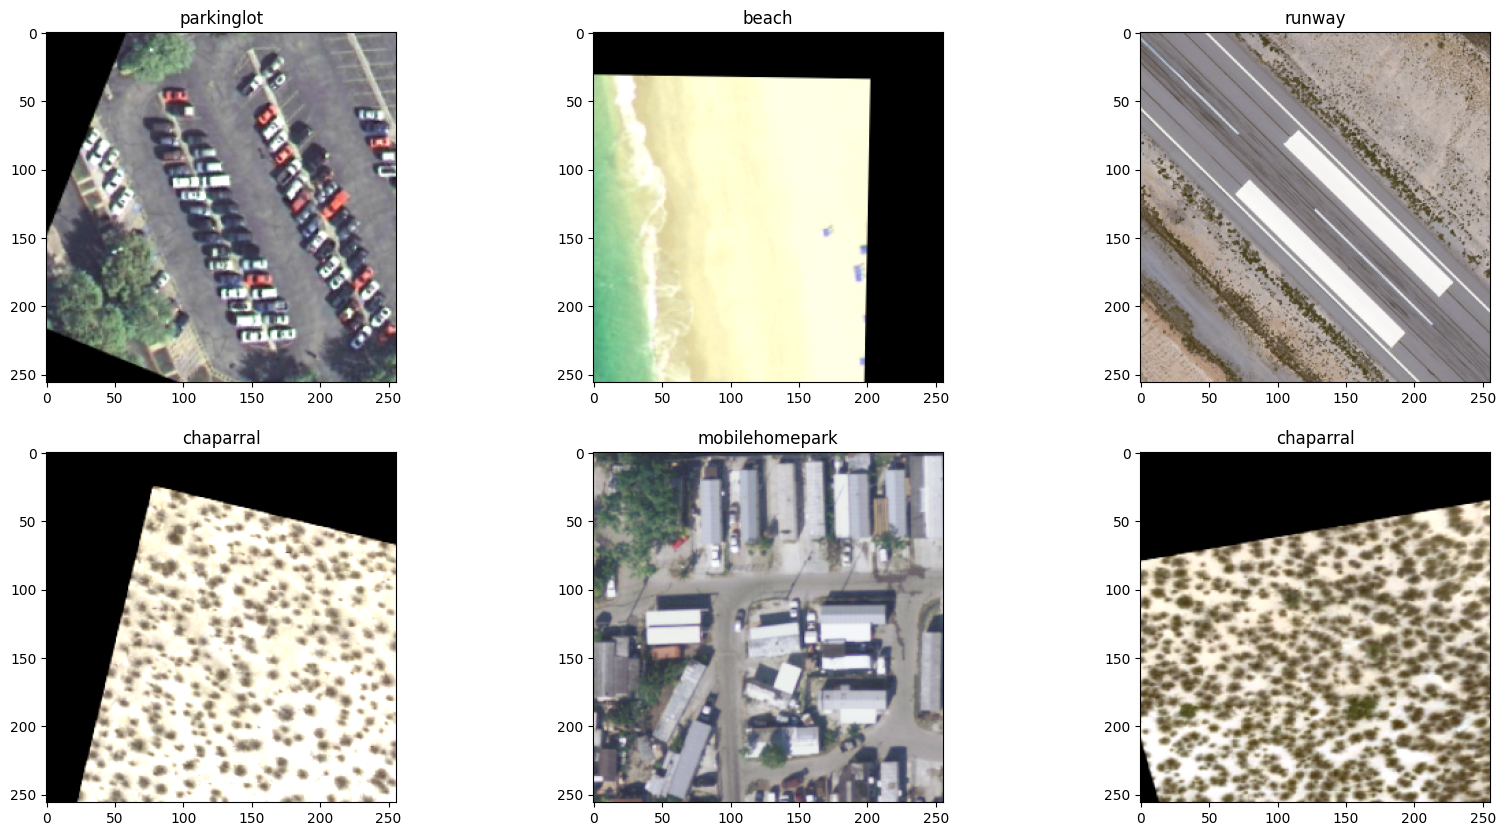

In [6]:
import matplotlib.pyplot as plt
import random

plt.figure(figsize=(20, 10))
for i in range(1, 7):
    plt.subplot(2, 3, i)
    image_path, prediction = random.choice(list(predict.items()))
    image = plt.imread(image_path)
    plt.imshow(image)
    plt.title(prediction)
plt.show()

In [7]:
predict_proba = fed.predict_proba(data_path=TEST_IMAGE_FOLDER,
                                  transform=Compose([ToTensor(), Resize((256, 256), antialias=None)]))
predict_proba

2023-06-13 12:02:12,453 INFO: ClassificationExperimenter - Computing predictions
100%|██████████| 1050/1050 [00:03<00:00, 296.17it/s]


{'/media/n31v/data/datasets/Land-Use_Scene_Classification/images_train_test_val/test/agricultural/agricultural_000137.png': [0.9999980926513672,
  3.6075992453782346e-12,
  1.2888687450640646e-08,
  8.131956441559396e-09,
  3.6916911919564015e-17,
  1.373557934059022e-10,
  2.511514210167059e-21,
  5.05438024767102e-10,
  1.8468233520252397e-06,
  1.1426789114921121e-07,
  2.316423617201494e-16,
  1.1842892118363313e-13,
  2.0711083886421954e-20,
  1.1591890935431569e-18,
  3.652003366383383e-09,
  5.403406698002418e-21,
  3.240210530441878e-11,
  2.2772318752917187e-10,
  1.1920573340549415e-14,
  8.969078257869967e-11,
  1.7459242385164941e-10],
 '/media/n31v/data/datasets/Land-Use_Scene_Classification/images_train_test_val/test/agricultural/agricultural_000312.png': [0.999954104423523,
  1.3983790687899234e-11,
  4.226383132355238e-12,
  8.077502555714489e-11,
  8.132145130901325e-12,
  7.943271596033696e-10,
  2.7045738844772658e-17,
  1.7693368992155456e-10,
  8.405131701749724e-0

### Advanced Image classification example

In this example we will use the same dataset as in the previous example, but we will use the advanced features of
FedotIndustrial class. To conduct an advanced experiment one should instantiate FedotIndustrial class with optimization method argument and optimization parameters:

In [8]:
fed = FedotIndustrial(task='image_classification',
                      num_classes=21,
                      optimization='svd',
                      optimization_params={'energy_thresholds': [0.99]}
                      )

2023-06-13 12:02:20,512 INFO: FedotIndustrialAPI - Initialising experiment setup
2023-06-13 12:02:20,513 INFO: FedotIndustrialAPI - Initialising solver
2023-06-13 12:02:20,597 INFO: CVExperimenter - ClassificationExperimenter initialised


Method fit also must be provided with additional argument – finetuning_params:

In [9]:
fitted_model = fed.fit(dataset_path=DATASETS_PATH,
                       transform=Compose([ToTensor(), Resize((256, 256), antialias=None)]),
                       num_epochs=40,
                       finetuning_params={'num_epochs': 5})

2023-06-13 12:02:23,553 INFO: CVExperimenter - Dataset preparing
100%|██████████| 10500/10500 [00:15<00:00, 678.45it/s]
2023-06-13 12:02:39,049 INFO: SVDOptimization - Default size: 44.79 Mb
2023-06-13 12:02:39,834 INFO: SVDOptimization - SVD decomposed size: 50.74 Mb
2023-06-13 12:02:39,835 INFO: ClassificationExperimenter - train: ResNet_SVD_channel_O-10_H-0.1, using device: cuda
100%|██████████| 263/263 [00:01<00:00, 180.00it/s]
/home/n31v/workspace/Fedot.Industrial/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
2023-06-13 12:02:41,419 INFO: ClassificationExperimenter - Best f1 score: 0.008961042031908173
2023-06-13 12:02:41,479 INFO: ClassificationExperimenter - Saved to /home/n31v/workspace/Fedot.Industrial/fedot_ind/results_o

Epoch 00036: reducing learning rate of group 0 to 2.0000e-04.


100%|██████████| 263/263 [00:01<00:00, 168.70it/s]
2023-06-13 12:19:38,110 INFO: ClassificationExperimenter - Best f1 score: 0.9405777164278277
2023-06-13 12:19:38,174 INFO: ClassificationExperimenter - Saved to /home/n31v/workspace/Fedot.Industrial/fedot_ind/results_of_experiments/models/images/ResNet_SVD_channel_O-10_H-0.1/train.sd.pt.
2023-06-13 12:19:38,175 INFO: ClassificationExperimenter - Epoch 38
100%|██████████| 263/263 [00:01<00:00, 173.28it/s]
2023-06-13 12:20:07,123 INFO: ClassificationExperimenter - Epoch 39
100%|██████████| 263/263 [00:01<00:00, 169.85it/s]
2023-06-13 12:20:33,115 INFO: ClassificationExperimenter - Best f1 score: 0.9448710266507999
2023-06-13 12:20:33,185 INFO: ClassificationExperimenter - Saved to /home/n31v/workspace/Fedot.Industrial/fedot_ind/results_of_experiments/models/images/ResNet_SVD_channel_O-10_H-0.1/train.sd.pt.
2023-06-13 12:20:33,186 INFO: ClassificationExperimenter - Epoch 40
100%|██████████| 263/263 [00:01<00:00, 163.64it/s]
2023-06-13 12:

To obtain predict one must use the following code:

In [10]:
predict = fed.predict(data_path=TEST_IMAGE_FOLDER,
                      transform=Compose([ToTensor(), Resize((256, 256), antialias=None)]))
predict

2023-06-13 12:24:17,152 INFO: ClassificationExperimenter - Computing predictions
100%|██████████| 1050/1050 [00:04<00:00, 226.40it/s]


{'/media/n31v/data/datasets/Land-Use_Scene_Classification/images_train_test_val/test/agricultural/agricultural_000137.png': 'agricultural',
 '/media/n31v/data/datasets/Land-Use_Scene_Classification/images_train_test_val/test/agricultural/agricultural_000312.png': 'runway',
 '/media/n31v/data/datasets/Land-Use_Scene_Classification/images_train_test_val/test/agricultural/agricultural_000007.png': 'agricultural',
 '/media/n31v/data/datasets/Land-Use_Scene_Classification/images_train_test_val/test/agricultural/agricultural_000028.png': 'agricultural',
 '/media/n31v/data/datasets/Land-Use_Scene_Classification/images_train_test_val/test/agricultural/agricultural_000033.png': 'agricultural',
 '/media/n31v/data/datasets/Land-Use_Scene_Classification/images_train_test_val/test/agricultural/agricultural_000042.png': 'agricultural',
 '/media/n31v/data/datasets/Land-Use_Scene_Classification/images_train_test_val/test/agricultural/agricultural_000052.png': 'agricultural',
 '/media/n31v/data/dataset

Visualization of predictions

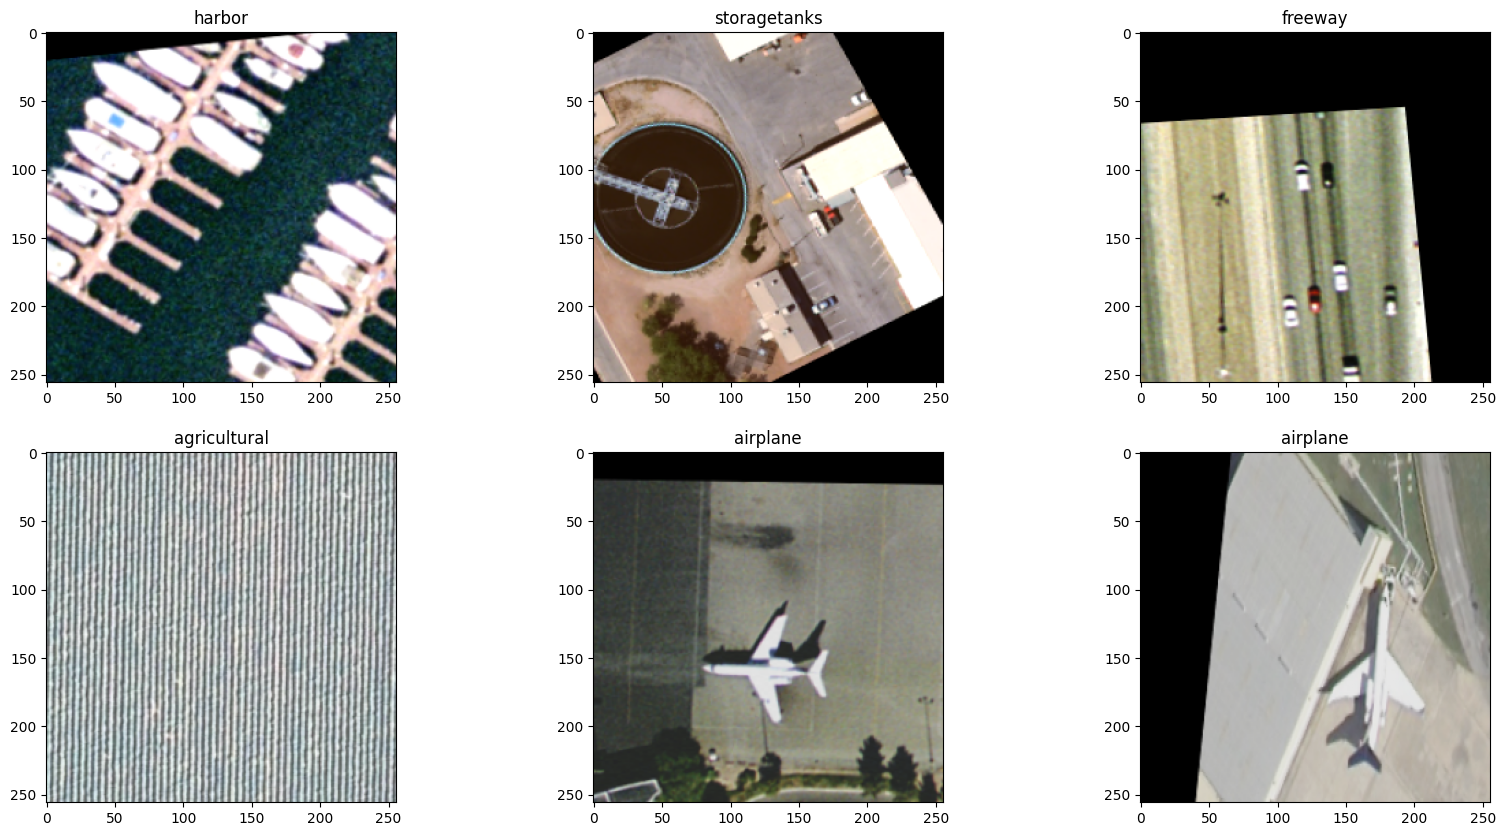

In [11]:
import matplotlib.pyplot as plt
import random

plt.figure(figsize=(20, 10))
for i in range(1, 7):
    plt.subplot(2, 3, i)
    image_path, prediction = random.choice(list(predict.items()))
    image = plt.imread(image_path)
    plt.imshow(image)
    plt.title(prediction)
plt.show()

In [12]:
predict_proba = fed.predict_proba(data_path=TEST_IMAGE_FOLDER,
                                  transform=Compose([ToTensor(), Resize((256, 256), antialias=None)]))
predict_proba

2023-06-13 12:24:37,651 INFO: ClassificationExperimenter - Computing predictions
100%|██████████| 1050/1050 [00:04<00:00, 228.36it/s]


{'/media/n31v/data/datasets/Land-Use_Scene_Classification/images_train_test_val/test/agricultural/agricultural_000137.png': [0.9997578263282776,
  5.726088048163547e-09,
  8.744754268263932e-06,
  2.4075716282823123e-05,
  8.975650778175748e-11,
  2.8843339805462165e-07,
  2.7524219882446577e-12,
  2.08112496125068e-07,
  8.589005119574722e-06,
  1.568417064845562e-05,
  8.225393144378756e-10,
  2.67603752490686e-07,
  6.018993636836001e-11,
  7.104601195545568e-12,
  9.70234623309807e-07,
  6.341127167623639e-13,
  1.459234368894613e-07,
  0.00018226807878818363,
  2.206155480521943e-09,
  6.685109497084341e-07,
  2.2711451208579092e-07],
 '/media/n31v/data/datasets/Land-Use_Scene_Classification/images_train_test_val/test/agricultural/agricultural_000312.png': [0.4857836365699768,
  1.9531572803543895e-08,
  2.2597633986265464e-08,
  1.071457145229715e-08,
  1.0011716256030923e-07,
  6.163299870465266e-10,
  4.683247192827089e-11,
  2.515756989396323e-07,
  1.896362732622947e-06,
  2.